![Growdev](https://www.growdev.com.br/assets/images/logo_growdev.png)

![Formação Engenharia de Dados](https://d335luupugsy2.cloudfront.net/cms/files/524558/1707226566/$occu5m8t1op)

Este material tem como objetivo incentivar a prática dos conteúdos estudados até o momento, e a pesquisa. Tenha em consideração que o exercício foi pensado para incentivar a prática dos conteúdos estudados até então, porém aprender a pesquisar faz parte do processo de aprendizagem.

Fique tranquilo, faça os exercícios com calma, e boa prática!


#Orientações:

 - Faça uma copia deste arquivo
 - Após concluir os exercicios, suba seu exercicio para o GitHub e compartilhe o link no **google** Classroom


#Exercícios pandas e plot

As questões a seguir utilizam como base o dataset de venda de jogos eletrônicos disponível no seguinte [link.](https://www.kaggle.com/code/rafa84miranda/vendas-de-jogos-de-videogames/data?select=vgsales.csv)

Os campos são:
- Rank: posição no ranking de vendas
- Name: nome do jogo
- Platform: plataforma/console
- Year: ano de lançamento
- Genre: gênero
- Publisher: empresa que publicou o jogo
- NA_Sales: vendas na américa do norte (em milhões de dólares)
- EU_Sales: vendas na europa (em milhões de dólares)
- JP_Sales: vendas no japão (em milhões de dólares)
- Other_Sales: outras vendas (em milhões de dólares)
- Global_Sales: vendas globais (em milhões de dólares)


Qual foi o jogo mais vendido no mundo em 2010?



In [3]:
import pandas as pd
import numpy as np

ds_vendas_jogos = pd.read_csv('/content/vgsales.csv')

In [7]:
ds_vendas_jogos[ds_vendas_jogos['Year'] == 2010].sort_values(by= 'Global_Sales', ascending= False)\
                                                .head(1)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
11183,16,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82


Qual foi a empresa que mais vendeu de 2005 até 2016 - Construa um gráfico de barras para apresentar


In [19]:
lista_empresas = ds_vendas_jogos['Publisher'].unique()

In [ ]:
ds_vendas_jogos[(ds_vendas_jogos['Publisher'] == 'Ascaron Entertainment GmbH') & (ds_vendas_jogos['Year'] >=2005)][['Global_Sales']]

In [20]:
dict_empresa_vendas_totais_2005_2016 = {}
for empresa in lista_empresas:
  venda_total_2005_2016 = ds_vendas_jogos[(ds_vendas_jogos['Publisher'] == empresa) & (ds_vendas_jogos['Year'] >=2005)][['Global_Sales']].sum()
  dict_empresa_vendas_totais_2005_2016.update({empresa : venda_total_2005_2016})

In [60]:
df_empresa_vendas_totais_2005_2016 = pd.DataFrame(dict_empresa_vendas_totais_2005_2016)

In [61]:
df_empresa_vendas_totais_2005_2016 = df_empresa_vendas_totais_2005_2016.T.sort_values(by='Global_Sales', ascending=False).head(15)

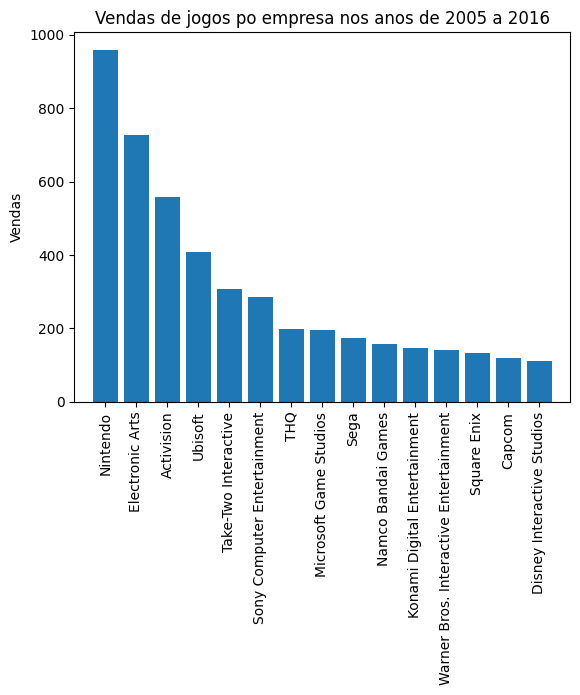

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

fig = plt.figure(1, [20, 8])
ax.set_xlim(-1,15)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')

empresas = df_empresa_vendas_totais_2005_2016['Global_Sales'].index
vendas = df_empresa_vendas_totais_2005_2016['Global_Sales'].values

ax.bar(empresas, vendas)

ax.set_ylabel('Vendas')
ax.set_title('Vendas de jogos po empresa nos anos de 2005 a 2016')

plt.show()

Qual o nome do jogo que menos foi vendido em 2008 do gênero Sports.


In [64]:
ds_vendas_jogos[(ds_vendas_jogos['Year'] == 2008) & (ds_vendas_jogos['Genre'] == 'Sports')].sort_values(by='Global_Sales').head(1)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
9731,16494,Summer Athletics,PC,2008,Sports,DTP Entertainment,0.0,0.01,0.0,0.0,0.01


Qual o percentual relacionado às vendas globais de jogos de Wii (excluindo-se América do norte, japão e europa) de 2006 até 2010?





In [71]:
vendas_globais_wii_2006_2010 = ds_vendas_jogos[(ds_vendas_jogos['Platform'] == 'Wii') & (ds_vendas_jogos['Year'] >= 2006) & (ds_vendas_jogos['Year']<=2010)][['Global_Sales']].sum().values
vendas_globais_wii_2006_2010 = vendas_globais_wii_2006_2010[0]

In [72]:
vendas_outros_mercados_wii_2006_2010 = ds_vendas_jogos[(ds_vendas_jogos['Platform'] == 'Wii') & (ds_vendas_jogos['Year'] >= 2006) & (ds_vendas_jogos['Year']<=2010)][['Other_Sales']].sum().values
vendas_outros_mercados_wii_2006_2010 = vendas_outros_mercados_wii_2006_2010[0]

In [78]:
dado = vendas_outros_mercados_wii_2006_2010/vendas_globais_wii_2006_2010
formato = "{:.2%}".format(dado)
print(f'A venda de jogos para Wii em Outro Mercados representa {formato} da venda global entre 2006 e 2010.')

A venda de jogos para Wii em Outro Mercados representa 8.75% da venda global entre 2006 e 2010.


Mostre um gráfico de linhas com as vendas em diferentes plataformas ao longo dos anos.


In [126]:
ds_vendas_jogos['Platform'].unique()

array(['2600', 'NES', 'PC', 'DS', 'GB', 'SNES', 'GEN', 'GG', 'SCD', 'NG',
       'PS', 'SAT', '3DO', 'TG16', 'N64', 'PCFX', 'DC', 'WS', 'PS2', 'XB',
       'GBA', 'GC', 'PSP', 'X360', 'Wii', 'PS3', '3DS', 'PSV', 'WiiU',
       'PS4', 'XOne'], dtype=object)

In [127]:
#lista_plataforma = ds_vendas_jogos['Platform'].unique()
lista_plataforma = ['NES', 'PC', 'DS','X360', 'Wii', 'PS3', '3DS']
lista_anos = ds_vendas_jogos['Year'].unique()


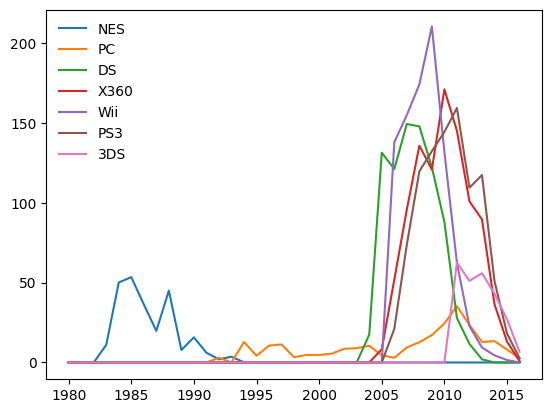

In [128]:
dict_vendas_plataforma_ano = {}

for plataforma in lista_plataforma:
  for ano in lista_anos:
      venda_ano = ds_vendas_jogos[(ds_vendas_jogos['Platform'] == plataforma) & (ds_vendas_jogos['Year'] == ano)]['Global_Sales'].sum()
      dict_vendas_plataforma_ano.update({ano : venda_ano})
  plt.plot(list(dict_vendas_plataforma_ano.keys()), list(dict_vendas_plataforma_ano.values()), label = plataforma)



plt.legend(loc='upper left', frameon=False)

Mostre um gráfico de pizza com o percentual de vendas dos diferentes gêneros de jogos.




In [140]:
lista_genero = ds_vendas_jogos['Genre'].unique()
venda_total = ds_vendas_jogos['Global_Sales'].sum()

In [141]:
lista_genero

array(['Shooter', 'Misc', 'Fighting', 'Sports', 'Action', 'Platform',
       'Puzzle', 'Racing', 'Simulation', 'Adventure', 'Role-Playing',
       'Strategy'], dtype=object)

In [143]:
dict_vendas_genero = {}
for genero in lista_genero:
  venda = ds_vendas_jogos[ds_vendas_jogos['Genre'] == genero]['Global_Sales'].sum()
  dict_vendas_genero.update({genero : (venda/venda_total)})

dict_vendas_genero

{'Shooter': 0.1163451171217338,
 'Misc': 0.0904299281998025,
 'Fighting': 0.05034403552709599,
 'Sports': 0.14843469220469577,
 'Action': 0.1953298693583332,
 'Platform': 0.09400463249024127,
 'Puzzle': 0.02746161982968853,
 'Racing': 0.08239733070606362,
 'Simulation': 0.04423427294505522,
 'Adventure': 0.026620379555820604,
 'Role-Playing': 0.10473554784355651,
 'Strategy': 0.019662574217912978}

<Axes: >

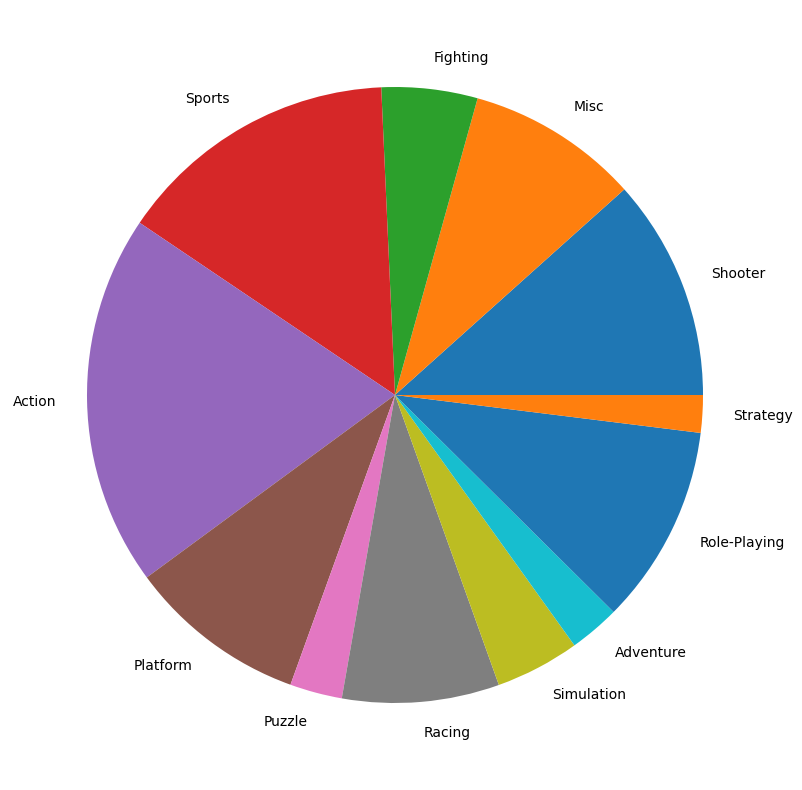

In [153]:
pd.Series(dict_vendas_genero).plot.pie(figsize = (10,10))

#Exercícios_pandas

Utilize os arquivos [livros.csv](https://drive.google.com/file/d/1fzuUyFxhzhE9U4_-i3IIUTwvgr3QG1Hj/view?usp=sharing), [livros_genero.csv](https://drive.google.com/file/d/1Cww5lAb7l_LQXVhH1ieyIOWIrqorNKcn/view?usp=sharing) e [livros_classicos.csv](https://drive.google.com/file/d/1pbSReiGSIIlHHXbFBOAaA5zTlNTrbY9P/view?usp=sharing) como entrada para o processamento requerido nos seguintes exercícios.


In [3]:
import pandas as pd
df_livros = pd.read_csv('/content/livros.csv')
df_livros_classicos = pd.read_csv('/content/livros_classicos.csv')
df_livros_genero = pd.read_csv('/content/livros_genero.csv')


In [5]:
df_livros

,nome,paginas
0,livro 1,257
1,livro 2,106
2,livro 3,150
3,livro 4,175
4,livro 5,321
5,livro 6,159
6,livro 7,980
7,livro 8,235
8,livro 9,745
9,livro 10,126


In [6]:
df_livros_classicos

,nome,autor
0,livro 1,Jorge
1,livro 2,Santos
2,livro 3,Leandro
3,livro 4,Clara
4,livro 5,Flavia
5,livro 6,Leandro
6,livro 7,Santos
7,livro 8,Marcia
8,livro 9,Marcia
9,livro 10,Clara


In [7]:
df_livros_genero

,genero,autor
0,Drama,Pedro
1,Aventura,José
2,Drama,Carlos
3,Romance,Maria
4,Romance,Fabio
5,Aventura,Aline
6,Drama,Paulo
7,Aventura,Sandro
8,Romance,Maria
9,Aventura,Fabio


Faça a concatenação das bases de dados livros.csv e livros_genero.csv e encontre qual o gênero de livro correspondente a cada livro.

In [52]:
df_livros_livros_genero = df_livros.join(df_livros_genero)
df_livros_livros_genero

,nome,paginas,ID,genero,autor
0,livro 1,257,1,Drama,Pedro
1,livro 2,106,2,Aventura,José
2,livro 3,150,3,Drama,Carlos
3,livro 4,175,4,Romance,Maria
4,livro 5,321,5,Romance,Fabio
5,livro 6,159,6,Aventura,Aline
6,livro 7,980,7,Drama,Paulo
7,livro 8,235,8,Aventura,Sandro
8,livro 9,745,9,Romance,Maria
9,livro 10,126,10,Aventura,Fabio


Faça a concatenação das bases de dados de livros e livros_genero e encontre qual os gêneros e os autores que não possuem um livro correspondente.

In [65]:
df_concatenado = pd.concat([df_livros,df_livros_genero])
df_concatenado
df_concatenado[(df_concatenado['autor'].notnull()) & (df_concatenado['nome'].isnull())][['genero', 'autor']]


,genero,autor
0,Drama,Pedro
1,Aventura,José
2,Drama,Carlos
3,Romance,Maria
4,Romance,Fabio
5,Aventura,Aline
6,Drama,Paulo
7,Aventura,Sandro
8,Romance,Maria
9,Aventura,Fabio


Faça a junção das bases de livros e livros clássicos.

In [ ]:
df_livros_livros_classicos = df_livros.merge(df_livros_classicos, left_on='nome', right_on='nome')
df_livros_livros_classicos

Faça a junção das bases de livros e livros clássicos apenas com os elementos em comum entre ambos e remova os índices dos antigos dataframes.

In [24]:
df_livros_livros_classicos = df_livros.merge(df_livros_classicos, left_on='nome', right_on='nome')
df_livros_livros_classicos.set_index('nome', inplace=True)
df_livros_livros_classicos

,paginas,autor
nome,,
livro 1,257,Jorge
livro 2,106,Santos
livro 3,150,Leandro
livro 4,175,Clara
livro 5,321,Flavia
livro 6,159,Leandro
livro 7,980,Santos
livro 8,235,Marcia
livro 9,745,Marcia


Faça a junção das bases de livros e livros clássicos apenas com os elementos comuns entre ambos, e adicione chaves para o dataframe de livros e de livros clássicos.

In [30]:
colunas_comuns = list(set(df_livros.columns) & set(df_livros_classicos.columns))
df_livros_livros_classicos = pd.merge(df_livros, df_livros_classicos, on=colunas_comuns)

df_livros['ID'] = range(1, len(df_livros) + 1)
df_livros_classicos['ID'] = range(1, len(df_livros_classicos) + 1)

In [27]:
df_livros_livros_classicos

,nome,paginas,autor
0,livro 1,257,Jorge
1,livro 2,106,Santos
2,livro 3,150,Leandro
3,livro 4,175,Clara
4,livro 5,321,Flavia
5,livro 6,159,Leandro
6,livro 7,980,Santos
7,livro 8,235,Marcia
8,livro 9,745,Marcia
9,livro 10,126,Clara


In [28]:
df_livros

,nome,paginas,ID
0,livro 1,257,1
1,livro 2,106,2
2,livro 3,150,3
3,livro 4,175,4
4,livro 5,321,5
5,livro 6,159,6
6,livro 7,980,7
7,livro 8,235,8
8,livro 9,745,9
9,livro 10,126,10


In [29]:
df_livros_classicos

,nome,autor,ID
0,livro 1,Jorge,1
1,livro 2,Santos,2
2,livro 3,Leandro,3
3,livro 4,Clara,4
4,livro 5,Flavia,5
5,livro 6,Leandro,6
6,livro 7,Santos,7
7,livro 8,Marcia,8
8,livro 9,Marcia,9
9,livro 10,Clara,10


Faça a junção das bases de livros e livros clássicos apenas com os elementos comuns entre ambos, e adicione chaves para o dataframe de livros e de livros clássicos, além de nomes para os índices.

In [ ]:
colunas_comuns = list(set(df_livros.columns) & set(df_livros_classicos.columns))
elementos_comuns = pd.merge(df_livros, df_livros_classicos, on=colunas_comuns)

df_livros['ID'] = range(1, len(df_livros) + 1)
df_livros_classicos['ID'] = range(1, len(df_livros_classicos) + 1)

Faça a junção das bases de dados livros e livros_classicos e verifique a integridade do dataframe resultante.

In [46]:
df_livros_livros_classicos = df_livros.merge(df_livros_classicos, left_on='nome', right_on='nome')
df_livros_livros_classicos.drop(axis=1, columns= 'ID_x', inplace= True)
df_livros_livros_classicos.rename(columns={'ID_y' : 'ID'}, inplace= True)
df_livros_livros_classicos

,nome,paginas,autor,ID
0,livro 1,257,Jorge,1
1,livro 2,106,Santos,2
2,livro 3,150,Leandro,3
3,livro 4,175,Clara,4
4,livro 5,321,Flavia,5
5,livro 6,159,Leandro,6
6,livro 7,980,Santos,7
7,livro 8,235,Marcia,8
8,livro 9,745,Marcia,9
9,livro 10,126,Clara,10


In [49]:
duplicados = df_livros_livros_classicos.duplicated().sum()
faltantes = df_livros_livros_classicos.isnull().sum()

print(f'Duplicados: {duplicados}')
print(f'Nulos: \n{faltantes}')

Duplicados: 0
Nulos: 
nome       0
paginas    0
autor      0
ID         0
dtype: int64
